In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
# Load and preprocess data
df = pd.read_csv(r"C:\Users\Ahmed\Downloads\500_Person_Gender_Height_Weight_Index.csv")
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Update Index column with descriptive names
def convert_status_to_description(row):
    descriptions = {
        0: 'Extremely Weak',
        1: 'Weak',
        2: 'Normal',
        3: 'Overweight',
        4: 'Obesity',
        5: 'Extreme Obesity'
    }
    return descriptions.get(row['Index'], 'Unknown')

df_encoded["Index"] = df_encoded.apply(convert_status_to_description, axis=1)
df_encoded.head()


,Height,Weight,Index,Gender_Male
0,174,96,Obesity,1
1,189,87,Normal,1
2,185,110,Obesity,0
3,195,104,Overweight,0
4,149,61,Overweight,1


In [22]:
# Check for missing values
if df_encoded.isna().sum().any():
    print("Missing values detected. Please handle them appropriately.")
else:
    print("No missing values detected.")

# Split data into features and target
X = df_encoded.drop(columns=["Index"])
y = df_encoded["Index"]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)



No missing values detected.


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training and parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}



In [24]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate model with the best parameters
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)



In [25]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}
Accuracy: 0.90
F1 Score: 0.90
Precision: 0.90
Recall: 0.90

Classification Report:
                  precision    recall  f1-score   support

Extreme Obesity       0.95      0.97      0.96        36
 Extremely Weak       1.00      0.67      0.80         3
         Normal       0.82      0.90      0.86        10
        Obesity       0.90      0.88      0.89        32
     Overweight       0.86      0.80      0.83        15
           Weak       0.80      1.00      0.89         4

       accuracy                           0.90       100
      macro avg       0.89      0.87      0.87       100
   weighted avg       0.90      0.90      0.90       100


Confusion Matrix:
 [[35  0  0  1  0  0]
 [ 0  2  0  0  0  1]
 [ 0  0  9  0  1  0]
 [ 2  0  1 28  1  0]
 [ 0  0  1  2 12  0]
 [ 0  0  0  0  0  4]]


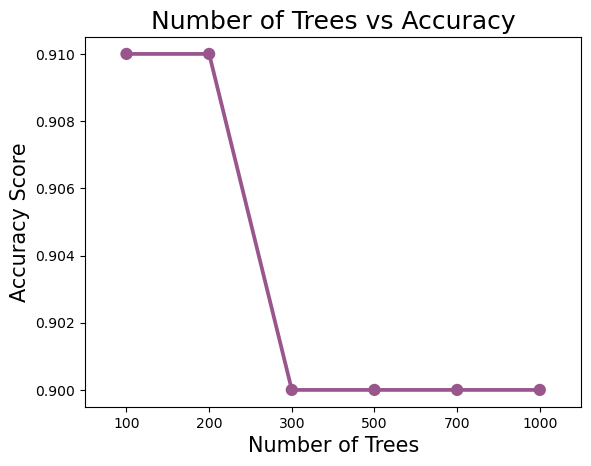

In [26]:
# Plot accuracy with increasing trees
trees_list = [100, 200, 300, 500, 700, 1000]
acc_scores = []
for n in trees_list:
    rfc = RandomForestClassifier(n_estimators=n, random_state=0, criterion='entropy')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Visualization
sns.pointplot(x=trees_list, y=acc_scores, color='#98568d')
plt.title('Number of Trees vs Accuracy', fontsize=18)
plt.xlabel('Number of Trees', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.show()



In [9]:


import joblib

# Save the model to a file
joblib.dump(best_rfc, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [11]:
# Load the trained model and scaler
model = joblib.load('random_forest_model.pkl')


In [29]:
## Test Model

# Input your test values
height = float(input("Enter your height in cm: "))
weight = float(input("Enter your weight in kg: "))

gender = input("Enter your gender (Male/Female): ")

# Encode gender based on training data structure
gender_male = 1 if gender.lower() == 'male' else 0

# Create the input array in the same format as the training data
user_input = pd.DataFrame([[height, weight,  gender_male]],
                          columns=['Height', 'Weight',  'Gender_Male'])

# Scale the entire row to match the scaler's expectations
user_input_scaled = scaler.transform(user_input)

# Predict using the model
prediction = model.predict(user_input_scaled)

# Print the prediction result
print("Predicted Health Index Category:", prediction[0])




Predicted Health Index Category: Overweight
